In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork, DataSet
from gympy.optimizers import SGD
from gympy.loss import CategoricalCrossEntropy, Accuracy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.0),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = SGD(learning_rate=1e-2),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.09996316],
       [0.09935502],
       [0.10118808],
       [0.10112034],
       [0.10066465],
       [0.10055315],
       [0.10080911],
       [0.09890176],
       [0.09847556],
       [0.09896918]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.309055808413777

In [12]:

dataset = DataSet(
    x = X,
    y = Y,
    batch_size=64
)


<class 'gympy.optimizers.optimizers.SGD'>
0 cost 2.2993902895289917 iter 22
100 cost 0.31333424324999093 iter 2122
200 cost 0.15791018950697394 iter 4222
300 cost 0.10883380558552458 iter 6322
400 cost 0.0796699660485858 iter 8422


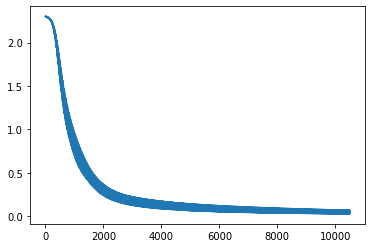

In [13]:
n_iter=5000
model.train_dataset(dataset, show=100, n_epochs=500)
plt.plot(model.cost)

In [14]:
model.forward(X[:,[453]])

array([[2.85566770e-05],
       [4.31700635e-06],
       [1.04012502e-03],
       [9.90985868e-01],
       [1.18589060e-07],
       [1.73562382e-04],
       [2.27306576e-06],
       [1.48852945e-04],
       [2.19467063e-04],
       [7.39685880e-03]])

In [15]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [16]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

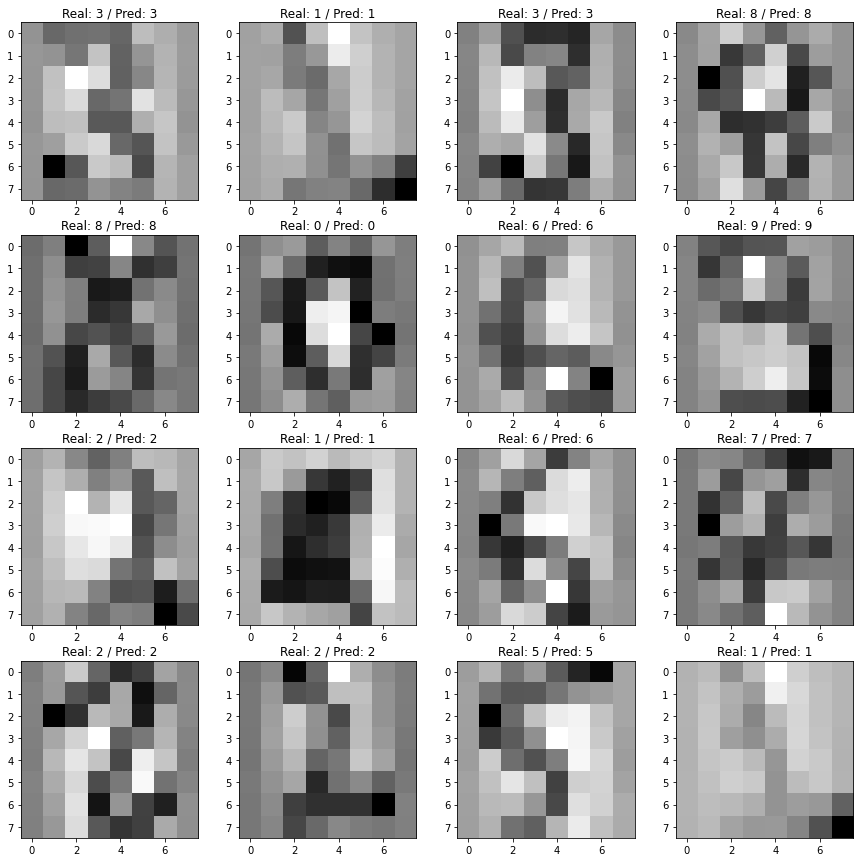

In [17]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')

In [18]:
prob_total = model.forward(X)
pred_total = np.argmax(prob_total,axis=0)
true_vals_total = np.argmax(Y, axis=0)

acc = Accuracy()
acc.forward(prob_total, Y)

0.9955456570155902